In [1]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# merging 12 months sales into one

In [2]:
listed_file = r'E:\vinay\dataset\Sales Dataset\Sales Dataset\Sales_Data'
files = [file for file in os.listdir(listed_file)]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
data_frames = []
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(listed_file, file)
        nf = pd.read_csv(file_path)
        data_frames.append(nf)

merged_df = pd.concat(data_frames, ignore_index=True)

output_file = r'E:\vinay\dataset\Sales Dataset\Sales Dataset\merged_file1.csv'
merged_df.to_csv(output_file, index=False)

In [4]:
df=pd.read_csv(r"E:\vinay\dataset\Sales Dataset\Sales Dataset\merged_file1.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# cleaning and transforming data

## droping null and duplicates value

In [5]:
df.shape

(186850, 6)

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [9]:
df=df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.duplicated().sum()

618

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
pd.isna(df).any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [15]:
for column in df.columns:
     unique_count = df[column].nunique(dropna=False)
     print(f"Column '{column}': {unique_count} unique values")

Column 'Order ID': 178438 unique values
Column 'Product': 20 unique values
Column 'Quantity Ordered': 10 unique values
Column 'Price Each': 24 unique values
Column 'Order Date': 142396 unique values
Column 'Purchase Address': 140788 unique values


### converting the text based categorical columns to numeric columns

In [16]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [17]:
df.rename(columns={'Order Date': 'order_date', 'Order ID': 'order_id', 'Quantity Ordered': 'quantity_ordered', 'Price Each': 'price_each', 'Purchase Address': 'purchase_address' }, inplace=True)

In [18]:
df.columns

Index(['order_id', 'Product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [19]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## dropping rows with values that are not numeric and not related to the format 


In [20]:
df[df['quantity_ordered']=='Quantity Ordered']

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [21]:
df.drop(519, inplace=True)

In [22]:
df['order_id']=pd.to_numeric(df['order_id'])
df['quantity_ordered']=pd.to_numeric(df['quantity_ordered'])
df['price_each']=pd.to_numeric(df['price_each'])

### adding new column of sales(quantity_ordered*price_each)

In [23]:
df['sales']=df['quantity_ordered']*df['price_each']

In [24]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


### creating the new column of date,month, year and time 

In [25]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%y %H:%M')
# here we are using  errors='coerce' because it will neglact error and pass

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['time'] = df['order_date'].dt.time

In [26]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,09:27:00


### Creating a new column and storeing the PIN Codes from the Address column

In [27]:
df['pincode']=df['purchase_address'].str[-6::]
df['pincode'].astype(int)

0         75001
2          2215
3         90001
4         90001
5         90001
          ...  
186845    90001
186846    94016
186847    94016
186848    94016
186849    94016
Name: pincode, Length: 185686, dtype: int32

In [28]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,08:46:00,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22:30:00,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14:38:00,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14:38:00,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,09:27:00,90001


### finding the pattern in order_id

In [29]:
df.order_id

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: order_id, Length: 185686, dtype: int64

#### order id start with 176558 and ends in 259357 with the step size 1

## creating the new column of city

In [30]:
df['city'] = df['purchase_address'].str.split(',').str[1].str.strip()

In [31]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,08:46:00,75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22:30:00,02215,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14:38:00,90001,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14:38:00,90001,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,09:27:00,90001,Los Angeles


### Grouping Product column into different categories such as Phones, Accessories, etc
### according to the data available.

In [32]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [33]:
df['Category'] = 'Other'

# Assigning category to products containing 'phone', 'accessories','headphone' and other keyword
df.loc[df['Product'].str.contains('phone', case=False), 'Category'] = 'Phones'

df.loc[df['Product'].str.contains('Headphones', case=False), 'Category'] = 'Headphones'

df.loc[df['Product'].str.contains('accessory|case', case=False), 'Category'] = 'Accessories'

df

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,08:46:00,75001,Dallas,Other
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22:30:00,02215,Boston,Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14:38:00,90001,Los Angeles,Phones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14:38:00,90001,Los Angeles,Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,09:27:00,90001,Los Angeles,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,20:56:00,90001,Los Angeles,Other
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,16:00:00,94016,San Francisco,Phones
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,07:39:00,94016,San Francisco,Phones
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,17:30:00,94016,San Francisco,Other


## Creating 12 separate date ordered dataframes for every month.

In [34]:
monthly_datframes={}
for month in range(1,13):
    month_df = df[(df['month'] == month)].copy()
    monthly_datframes[month]=month_df
    #print(monthly_datframes)
jan_df=monthly_datframes[1]
feb_df=monthly_datframes[2]
march_df=monthly_datframes[3]
april_df=monthly_datframes[4]
may_df=monthly_datframes[5]
june_df=monthly_datframes[6]
july_df=monthly_datframes[7]
aug_df=monthly_datframes[8]
sep_df=monthly_datframes[9]
oct_df=monthly_datframes[10]
nov_df=monthly_datframes[11]
dec_df=monthly_datframes[12]  

In [35]:
dec_df

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category
30394,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,30,00:01:00,10001,New York City,Other
30395,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,29,07:03:00,10001,New York City,Other
30396,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,12,18:21:00,10001,New York City,Other
30397,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,22,15:13:00,94016,San Francisco,Other
30398,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,18,12:38:00,30301,Atlanta,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153029,293993,AAA Batteries (4-pack),1,2.99,2019-12-01 00:41:00,"999 10th St, San Francisco, CA 94016",2.99,2019,12,1,00:41:00,94016,San Francisco,Other
153134,294093,USB-C Charging Cable,1,11.95,2019-12-01 00:37:00,"51 Cherry St, New York City, NY 10001",11.95,2019,12,1,00:37:00,10001,New York City,Other
153499,294441,Wired Headphones,1,11.99,2019-12-01 00:52:00,"469 Sunset St, San Francisco, CA 94016",11.99,2019,12,1,00:52:00,94016,San Francisco,Headphones
153696,294629,Wired Headphones,1,11.99,2019-12-01 01:54:00,"668 Ridge St, San Francisco, CA 94016",11.99,2019,12,1,01:54:00,94016,San Francisco,Headphones


In [36]:
jan_df

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category
31957,297150,Lightning Charging Cable,1,14.95,2020-01-01 00:38:00,"427 Wilson St, Dallas, TX 75001",14.95,2020,1,1,00:38:00,75001,Dallas,Other
32659,297817,iPhone,1,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",700.00,2020,1,1,00:22:00,10001,New York City,Phones
32660,297817,Lightning Charging Cable,2,14.95,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",29.90,2020,1,1,00:22:00,10001,New York City,Other
32819,297969,Google Phone,1,600.00,2020-01-01 00:54:00,"542 2nd St, San Francisco, CA 94016",600.00,2020,1,1,00:54:00,94016,San Francisco,Phones
33200,298344,Wired Headphones,4,11.99,2020-01-01 03:34:00,"731 7th St, New York City, NY 10001",47.96,2020,1,1,03:34:00,10001,New York City,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77265,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001",109.99,2019,1,26,19:09:00,75001,Dallas,Other
77266,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016",149.99,2019,1,10,22:58:00,94016,San Francisco,Other
77267,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035",999.99,2019,1,21,14:31:00,97035,Portland,Other
77268,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001",5.98,2019,1,15,14:21:00,90001,Los Angeles,Other


## we have cleaned and transform the data according to our requirement. now analysing the data

### we will see What was the best month for sales and How much was earned that month

In [37]:
a=df.groupby('month').sum(numeric_only=True)
a.drop(['year','day', 'price_each'], axis=1, inplace= True)

In [38]:
a

,order_id,quantity_ordered,sales
month,,,
1,1420152202,10893,1821413.16
2,1868278508,13431,2200078.08
3,2560592045,16979,2804973.35
4,3383299164,20536,3389217.98
5,3343056791,18653,3150616.23
6,2928868159,15234,2576280.15
7,3280010744,16054,2646461.32
8,2894980432,13429,2241083.37
9,2944144303,13091,2094465.69


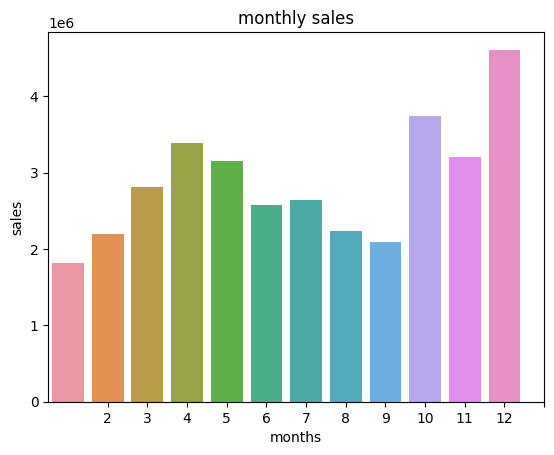

In [39]:
months = range(1,13)
sns.barplot(x=a.index,y=a['sales'],data=a)
plt.xlabel('months')
plt.ylabel('sales')
plt.title('monthly sales')
plt.xticks(months)
plt.show()

#### from this graph we can see that month 12 have highest sales and 4608295.70 was earned

### we will now see which city sold the most product

In [40]:
b=df.groupby('city').sum(numeric_only=True)
b

,order_id,quantity_ordered,price_each,sales,year,month,day
city,,,,,,,
Atlanta,3419484721,16584,2778608.69,2794199.07,30008397,104649,234571
Austin,2277506240,11137,1808340.03,1818044.33,19967912,69720,156495
Boston,4590961337,22494,3634398.40,3658627.65,40180123,140898,311856
Dallas,3410206282,16707,2750026.38,2765373.96,29875145,104447,234019
Los Angeles,6801454376,33247,5417171.70,5448304.28,59689717,208020,468969
New York City,5729940452,27903,4632920.54,4661867.14,50166103,175557,392223
Portland,2864927251,14037,2306588.80,2319331.94,25134533,87636,197290
San Francisco,10287205330,50169,8204001.38,8254743.55,90172590,314949,701517
Seattle,3402480817,16534,2730586.55,2745046.02,29705548,104817,229223


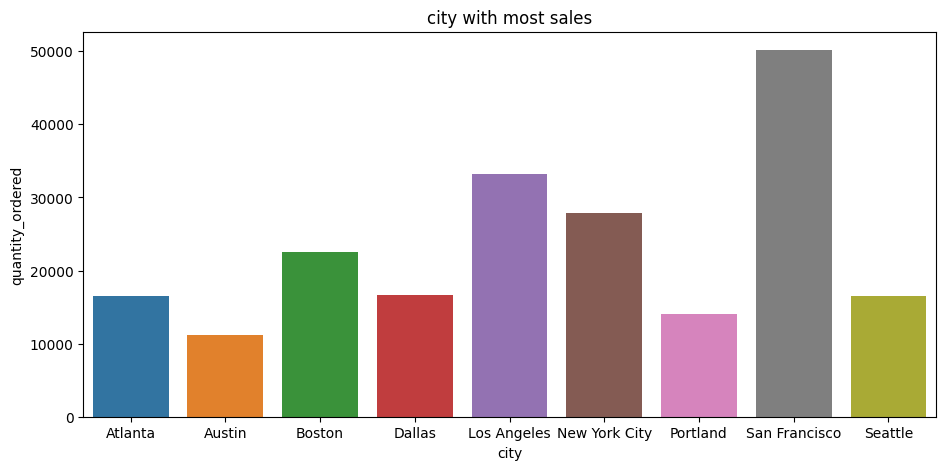

In [125]:
plt.figure(figsize=(11,5))
sns.barplot(x=b.index, y=b['quantity_ordered'],data=b)
plt.xlabel('city')
plt.ylabel('quantity_ordered')
plt.title('city with most sales')
plt.show()

#### from this graph we can see that sanfrancisco has sold the most number of product

### now we will see at What time should we display advertisements to maximize likelihood of customer's buying product

In [42]:
c=df.groupby('time').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending=False)
c

,order_id,quantity_ordered,price_each,sales,year,month,day
time,,,,,,,
19:20:00,54995252,281,52691.86,52903.41,496674,1630,3683
11:58:00,55805865,281,44725.49,45221.90,506769,1637,3956
19:36:00,54984340,274,44757.60,44984.38,480522,1689,3783
19:17:00,53235415,272,43267.81,43987.34,462351,1644,3726
13:25:00,55870868,271,38174.93,38364.10,484560,1735,3644
...,...,...,...,...,...,...,...
04:23:00,1474869,8,426.56,434.24,12114,48,87
03:28:00,1705717,8,1895.74,1895.74,16152,48,137
03:42:00,1895498,8,1662.85,1662.85,16152,61,127


In [43]:
c.head()

,order_id,quantity_ordered,price_each,sales,year,month,day
time,,,,,,,
19:20:00,54995252,281,52691.86,52903.41,496674,1630,3683
11:58:00,55805865,281,44725.49,45221.90,506769,1637,3956
19:36:00,54984340,274,44757.60,44984.38,480522,1689,3783
19:17:00,53235415,272,43267.81,43987.34,462351,1644,3726
13:25:00,55870868,271,38174.93,38364.10,484560,1735,3644


#### 19:20:00 is the best time to display advertisements to maximize likelihood of customer's buying product¶

### no we will see Which product was sold the least as per our categories and what might be the reason behind that.

In [44]:
df.columns

Index(['order_id', 'Product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'sales', 'year', 'month', 'day', 'time', 'pincode',
       'city', 'Category'],
      dtype='object')

In [82]:
d=df.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered')
d.head(1)

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
LG Dryer,146556268,646,387600.0,387600.0,1304274,4383,10071


In [84]:
df[df['Product']=='LG Dryer'].Category.head(1)

53    Other
Name: Category, dtype: object

##### from the following data we can see that LG Dryer of other category is the least sold product of other category the reson might be because most people buying big electronics items from offline market   

### Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale

In [46]:
def season(x):
    s = (6,7,8)
    w = (12,1,2)
    r = (9,10,11)
    if x in s:
        return 'Summer'
    elif x in w:
        return 'winter'
    elif x in r:
        return 'Rainny'
    else:
        return "other"
    
df['Seasons'] = df['month'].apply(season)   

In [47]:
df.head()

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category,Seasons
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,08:46:00,75001,Dallas,Other,other
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22:30:00,02215,Boston,Headphones,other
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14:38:00,90001,Los Angeles,Phones,other
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14:38:00,90001,Los Angeles,Headphones,other
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,09:27:00,90001,Los Angeles,Headphones,other


In [55]:
summer=df[df['Seasons']=='Summer']
summer.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending=False).head()

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
AAA Batteries (4-pack),995756648,6541,12991.55,19557.59,8772555,30304,68584
AA Batteries (4-pack),1019139365,5991,17095.68,23005.44,8988588,30981,70882
USB-C Charging Cable,1038931057,4977,54217.15,59475.15,9160203,31567,72211
Lightning Charging Cable,1054261630,4929,68829.80,73688.55,9295476,32022,73368
Wired Headphones,906300767,4326,47468.41,51868.74,7993221,27570,62449


In [57]:
winter=df[df['Seasons']=='winter']
winter.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending=False).head()

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
AAA Batteries (4-pack),1234430436,7809,15643.68,23348.91,10563411,37660,82643
AA Batteries (4-pack),1185818496,6875,19303.68,26400.00,10149513,36177,79351
USB-C Charging Cable,1324216894,6184,67648.95,73898.80,11429563,39941,89293
Lightning Charging Cable,1262132621,5731,79967.55,85678.45,10799636,38499,83072
Wired Headphones,1111153553,5098,56592.80,61125.02,9529681,33806,73981


In [58]:
Rainny=df[df['Seasons']=='Rainny']
Rainny.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending=False).head()

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
AAA Batteries (4-pack),1499793142,8300,16486.86,24817.00,11132766,55858,85888
AA Batteries (4-pack),1502021031,7333,21212.16,28158.72,11152956,55896,86871
USB-C Charging Cable,1613571262,6501,71006.90,77686.95,11996898,60023,94205
Lightning Charging Cable,1573148777,6199,86440.90,92675.05,11673858,58540,90941
Wired Headphones,1370383443,5498,60441.59,65921.02,10177779,51014,80487


In [59]:
other=df[df['Seasons']=='other']
other.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending=False).head()

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
AAA Batteries (4-pack),1028122785,8336,16507.79,24924.64,11146899,22327,88697
AA Batteries (4-pack),1032779738,7416,21331.20,28477.44,11215545,22369,88138
Lightning Charging Cable,1093346295,6310,87831.25,94334.50,11861625,23680,93302
USB-C Charging Cable,1062874024,6269,68342.05,74914.55,11546661,22989,89071
Wired Headphones,954933472,5602,61496.71,67167.98,10355451,20733,79740


#### from the data we can see that AAA Batteries(4_pack) are sold most

### now we will see Which phone is sold most during the month of March

In [52]:
march_df

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category
55543,150533,AAA Batteries (4-pack),1,2.99,2019-03-01 03:06:00,"270 Dogwood St, San Francisco, CA 94016",2.99,2019,3,1,03:06:00,94016,San Francisco,Other
55551,150541,AAA Batteries (4-pack),1,2.99,2019-03-01 01:03:00,"683 Adams St, Portland, OR 97035",2.99,2019,3,1,01:03:00,97035,Portland,Other
55834,150812,Wired Headphones,1,11.99,2019-03-01 02:18:00,"915 Maple St, San Francisco, CA 94016",11.99,2019,3,1,02:18:00,94016,San Francisco,Headphones
56817,151749,Bose SoundSport Headphones,1,99.99,2019-03-01 01:54:00,"993 Washington St, San Francisco, CA 94016",99.99,2019,3,1,01:54:00,94016,San Francisco,Headphones
57120,152036,ThinkPad Laptop,1,999.99,2019-03-01 05:56:00,"477 Washington St, San Francisco, CA 94016",999.99,2019,3,1,05:56:00,94016,San Francisco,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120484,176554,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016",14.95,2019,3,24,11:14:00,94016,San Francisco,Other
120485,176555,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016",149.99,2019,3,22,20:27:00,94016,San Francisco,Other
120486,176556,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001",8.97,2019,3,14,10:29:00,90001,Los Angeles,Other
120487,176557,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016",700.00,2019,3,30,12:32:00,94016,San Francisco,Phones


In [53]:
f=march_df[march_df['Category']=='Phones']
f.groupby('Product').sum(numeric_only=True).sort_values(by='quantity_ordered', ascending= False)

,order_id,quantity_ordered,price_each,sales,year,month,day
Product,,,,,,,
iPhone,90697414,538,375900.0,376600.0,1084203,1611,8715
Google Phone,78298138,463,277800.0,277800.0,934797,1389,7362
Vareebadd Phone,29446884,174,69600.0,69600.0,351306,522,2705


In [54]:
#df[(df['Category']=='Phones') & (df['month']==3)]

#### from the given data we can see that iphone sold most during the month of March

### now we will see Which headphones are the most expensive

In [73]:
g=df[df['Category']=='Headphones']
g.sort_values(by='price_each', ascending=False).head(1)

,order_id,Product,quantity_ordered,price_each,order_date,purchase_address,sales,year,month,day,time,pincode,city,Category,Seasons
186843,259351,Apple Airpods Headphones,1,150.0,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",150.0,2019,9,1,19:43:00,10001,New York City,Headphones,Rainny


#### from the following data we can see that Apple Airpods Headphones are the most expensive headphones

### Checking if the price of any product is changing in different months. If yes, then let's check the possible reason behind the price change

In [117]:
l = df['Product'].unique().tolist()
for i in l:
    x = df[df['Product']==i]['price_each'].unique()
    print(x)
    

[11.95]
[99.99]
[600.]
[11.99]
[1700.]
[14.95]
[389.99]
[3.84]
[150.]
[2.99]
[700.]
[300.]
[149.99]
[109.99]
[600.]
[999.99]
[400.]
[600.]
[379.99]


In [109]:
x.value_counts()

order_id  Product       quantity_ordered  price_each  order_date           purchase_address                          sales   year  month  day  time      pincode  city           Category  Seasons
141289    20in Monitor  1                 109.99      2019-01-28 11:17:00  534 Elm St, Atlanta, GA 30301             109.99  2019  1      28   11:17:00   30301   Atlanta        Other     winter     1
277496    20in Monitor  1                 109.99      2019-10-27 14:27:00  67 Pine St, Dallas, TX 75001              109.99  2019  10     27   14:27:00   75001   Dallas         Other     Rainny     1
261013    20in Monitor  1                 109.99      2019-10-06 07:09:00  266 11th St, Dallas, TX 75001             109.99  2019  10     6    07:09:00   75001   Dallas         Other     Rainny     1
261118    20in Monitor  1                 109.99      2019-10-07 15:46:00  387 Walnut St, Boston, MA 02215           109.99  2019  10     7    15:46:00   02215   Boston         Other     Rainny     1
26123

In [114]:
h = df.groupby(['Product', 'month'])['price_each'].mean()
h

Product       month
20in Monitor  1        109.99
              2        109.99
              3        109.99
              4        109.99
              5        109.99
                        ...  
iPhone        8        700.00
              9        700.00
              10       700.00
              11       700.00
              12       700.00
Name: price_each, Length: 228, dtype: float64

In [102]:
h.head(12)

0          11.95
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
177964    600.00
177986    600.00
178089    600.00
179036    600.00
179384    600.00
Name: price_each, Length: 2736, dtype: float64

In [122]:
i=h.groupby('Product').value_counts()
i

Product                     price_each
20in Monitor                109.99         9
                            109.99         2
                            109.99         1
27in 4K Gaming Monitor      389.99        11
                            389.99         1
27in FHD Monitor            149.99        12
34in Ultrawide Monitor      379.99        12
AA Batteries (4-pack)       3.84           7
                            3.84           4
                            3.84           1
AAA Batteries (4-pack)      2.99          11
                            2.99           1
Apple Airpods Headphones    150.00        12
Bose SoundSport Headphones  99.99         10
                            99.99          2
Flatscreen TV               300.00        12
Google Phone                600.00        12
LG Dryer                    600.00        12
LG Washing Machine          600.00        12
Lightning Charging Cable    14.95          9
                            14.95          2
                

In [121]:
df[df.Product=='20in Monitor'].value_counts()

order_id  Product       quantity_ordered  price_each  order_date           purchase_address                          sales   year  month  day  time      pincode  city           Category  Seasons
141289    20in Monitor  1                 109.99      2019-01-28 11:17:00  534 Elm St, Atlanta, GA 30301             109.99  2019  1      28   11:17:00   30301   Atlanta        Other     winter     1
277496    20in Monitor  1                 109.99      2019-10-27 14:27:00  67 Pine St, Dallas, TX 75001              109.99  2019  10     27   14:27:00   75001   Dallas         Other     Rainny     1
261013    20in Monitor  1                 109.99      2019-10-06 07:09:00  266 11th St, Dallas, TX 75001             109.99  2019  10     6    07:09:00   75001   Dallas         Other     Rainny     1
261118    20in Monitor  1                 109.99      2019-10-07 15:46:00  387 Walnut St, Boston, MA 02215           109.99  2019  10     7    15:46:00   02215   Boston         Other     Rainny     1
26123

#### from the following data we can see that there is no price differnce of any product for different months

### now we will see Which product in every category in more likely to be ordered in bulk

In [146]:
j=df.groupby("Category")[["Product", "quantity_ordered"]].max()
j

,Product,quantity_ordered
Category,,
Headphones,Wired Headphones,4
Other,USB-C Charging Cable,9
Phones,iPhone,2


In [148]:
h=j.sort_values(by="quantity_ordered", ascending=False)
h

,Product,quantity_ordered
Category,,
Other,USB-C Charging Cable,9
Headphones,Wired Headphones,4
Phones,iPhone,2


#### from the following data we can see that in other category usb-c was ordered most and in headphones category wired headphones are ordered in bulk and in phone category iphone was ordered in bulk